# Insuarance Premium
This project aims to develop a machine learning model capable of predicting medical insurance premium based on given patient data.

**Dataset Despcription**

Age: This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).

Sex: This is the policy holder's gender, either male or female.

BMI: This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.

Children: This is an integer indicating the number of children / dependents covered by the insurance plan. smoker: This is yes or no depending on whether the insured regularly smokes tobacco.

Region: This is the beneficiary's place of residence in the U.S., divided into four geographic regions: northeast, southeast, southwest, or northwest. Forecasting Numeric Data – Regression Methods

Installing the required packages

In [1]:
!pip install opendatasets
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

Importing and downloading the dataset from kaggle

In [2]:
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/mirichoi0218/insurance/data")

Skipping, found downloaded files in "./insurance" (use force=True to force download)


Importing required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.express as px


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LinearRegression

Loading the dataset

In [4]:
df=pd.read_csv("/content/insurance/insurance.csv")

## Explatory Visualizations

In [5]:
print(df.head())
df.info()

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
print(df.select_dtypes(include=['object']).describe())

         sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364


In [7]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


There are no NULL values in the dataset so no need to impute data or remove NULL values

In [8]:
df.shape

(1338, 7)

In [9]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Count of people getting insured in each dataset

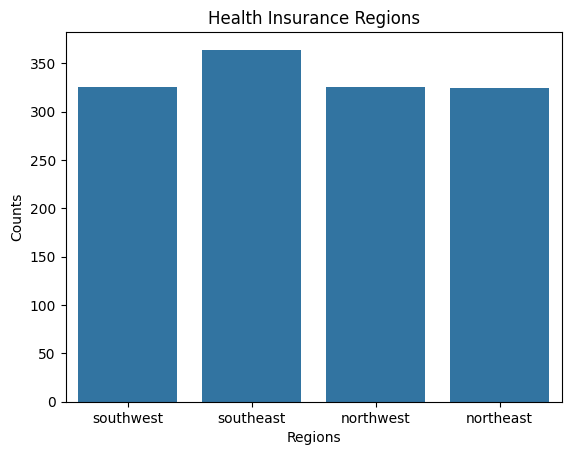

In [10]:
southwest = len(df[df['region'] == 'southwest'])
southeast = len(df[df['region'] == 'southeast'])
northwest = len(df[df['region'] == 'northwest'])
northeast = len(df[df['region'] == 'northeast'])

sns.barplot(x=['southwest', 'southeast', 'northwest', 'northeast'], y=[southwest, southeast, northwest, northeast])

plt.xlabel("Regions")
plt.ylabel("Counts")
plt.title("Health Insurance Regions")
plt.show()

Lets see the number of childern per person

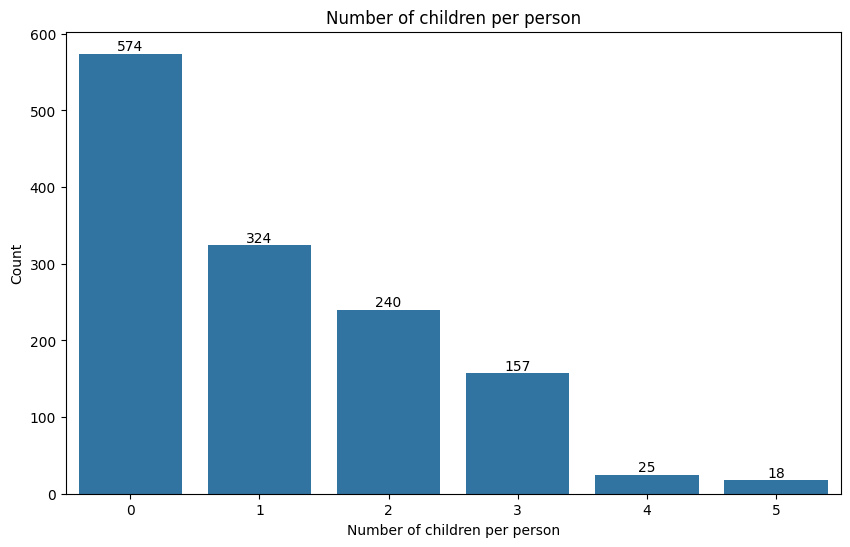

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x = df['children'])
plt.title('Number of children per person')
plt.xlabel('Number of children per person')
plt.ylabel('Count')

for i in ax.containers:
    ax.bar_label(i)

plt.show()

Now let's see the different counts for ages of people

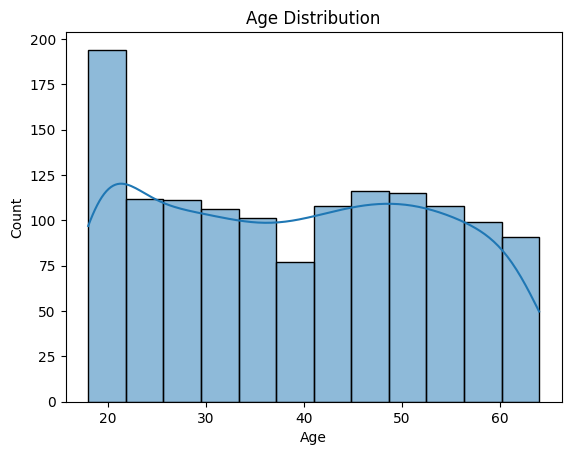

In [12]:
sns.histplot(data=df, x="age", kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

As we can see there are alot more young people(20-25) getting insured. After that the count plateaus

Now to check the number of smokers vs non smokers

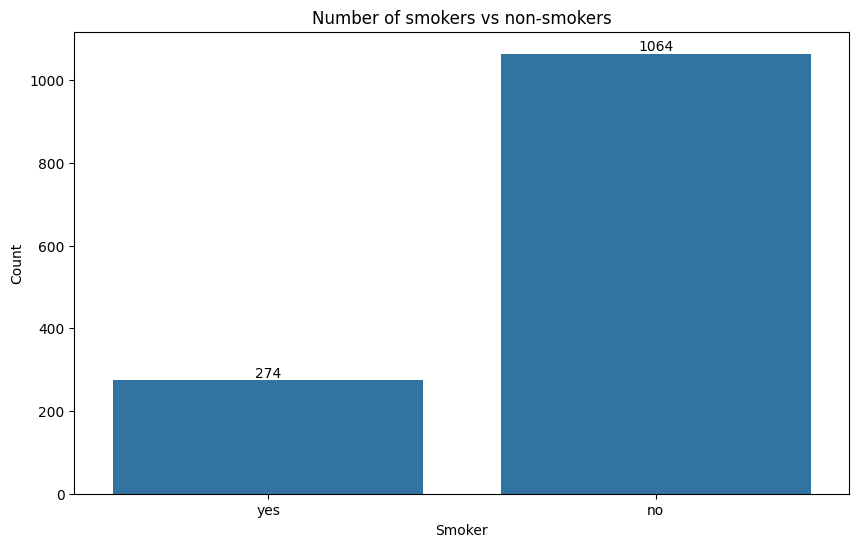

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x = df['smoker'])
plt.title('Number of smokers vs non-smokers')
plt.xlabel('Smoker')
plt.ylabel('Count')

for i in ax.containers:
    ax.bar_label(i)

plt.show()

Now to check the distribution of BMI of people

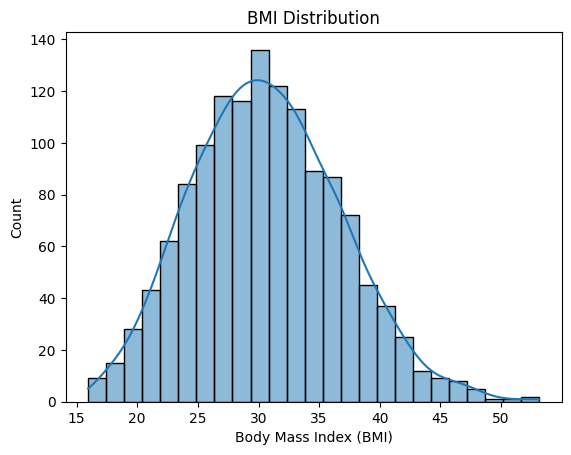

In [14]:
sns.histplot(data=df, x="bmi", kde=True)
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Count")
plt.title("BMI Distribution")
plt.show()

The BMI destribution is Normal Distribution with slight left-skew

Now to check the avg claim amounts for differnt types of people

In [15]:
cat=df.select_dtypes(include=['object']).columns.tolist()
for i in cat:
    obs=df[i].value_counts()
    avg_claim=df.groupby(i)["charges"].mean()
    display(pd.DataFrame({"Number of Policyholders":obs, "Average Claim Amount":avg_claim.map('${:,.2f}'.format)})\
            .sort_values('Number of Policyholders', ascending=False)\
            .style.set_caption("Variable: {}".format(i)))

,Number of Policyholders,Average Claim Amount
sex,,
male,676,"$13,956.75"
female,662,"$12,569.58"


,Number of Policyholders,Average Claim Amount
smoker,,
no,1064,"$8,434.27"
yes,274,"$32,050.23"


,Number of Policyholders,Average Claim Amount
region,,
southeast,364,"$14,735.41"
northwest,325,"$12,417.58"
southwest,325,"$12,346.94"
northeast,324,"$13,406.38"


Sex:

Number of Policyholders: There are 676 male policyholders and 662 female policyholders.
Average Claim Amount: On average, male policyholders have a claim amount of $13,956.75$, whereas female policyholders have a lower average claim amount of $12,569.58$.

Smoker:

Number of Policyholders: There are 1,064 non-smokers and 274 smokers.
Average Claim Amount: Smokers have a significantly higher average claim amount of $32,050.23$ compared to non-smokers, who have an average claim amount of $8,434.27$.

Region:

Number of Policyholders: The number of policyholders is fairly evenly distributed across regions with 364 in the Southeast, 325 in the Northwest, 325 in the Southwest, and 324 in the Northeast.
Average Claim Amount: The average claim amount varies by region, with the Southeast having the highest average at $14,735.41$ and the Southwest the lowest at $12,346.94$

## Data Cleaning

Replacing categorical values with numerical values

In [16]:
clean_data = {
    'sex': {'male': 0, 'female': 1},
    'smoker': {'no': 0, 'yes': 1},
    'region': {'northwest': 0, 'northeast': 1, 'southeast': 2, 'southwest': 3}
}

# Copy the original DataFrame to avoid modifying it directly
df_copy = df.copy()

# Replace categorical values with numerical values based on the dictionary
df_copy.replace(clean_data, inplace=True)

Checking for and removing outliers

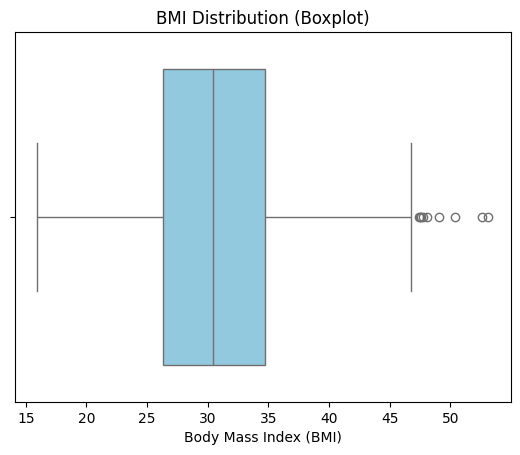

In [17]:
sns.boxplot(data=df, x="bmi", color="skyblue")
plt.xlabel("Body Mass Index (BMI)")
plt.title("BMI Distribution (Boxplot)")
plt.show()

As we can see there are outliers in BMI so we will remove them using the IQR method

In [18]:
q1 = df["bmi"].quantile(0.25)
q3 = df["bmi"].quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

df = df.loc[(df["bmi"] < upper_limit) & (df["bmi"] > lower_limit)].copy()

df.shape

(1329, 7)

We have gotten rid of 9 outliers.

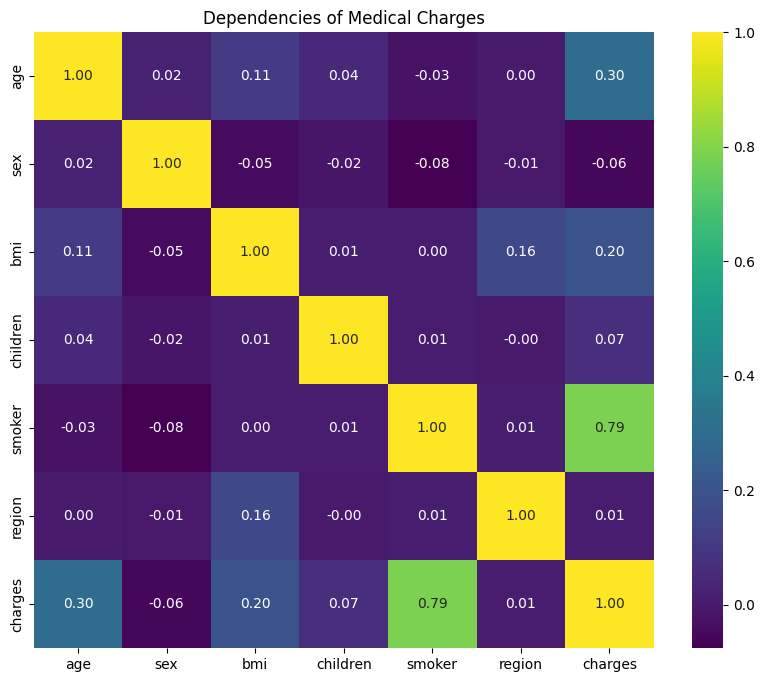

In [19]:
corr = df_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='viridis',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.show()

There is no significant correlation between any of the features except for a very strong correlation between smoking and charges. This suggests that being a smoker makes the insurance charges go up(which is true) and a slight correation between age and charges(which is also true)

Now to see how significant smoking is for the increase of charges we will do various plots with other features

In [20]:
plot_df = df.copy()
plot_df["Age_Group"]=['18 to 29 years' if i<30 else '30 to 44 years' if (i>=30)&(i<45) else
                      '45 to 59 years' if (i>=45)&(i<60) else '60 and over' for i in df['age']]
plot_df = plot_df.groupby(['Age_Group','smoker'])['charges'].mean()
plot_df = plot_df.rename('charges').reset_index().sort_values('smoker', ascending=True)
fig = px.bar(plot_df, x='Age_Group', y='charges', color='smoker', height=500, text='charges',
             opacity=0.75, barmode='group', color_discrete_sequence=['#107d34','#80f7a8'],
             title="Average Insurance Costs by Age and Smoking Status")
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#303030'))
fig.update_layout(font_color="#303030",bargroupgap=0.05, bargap=0.3,
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, title=""),
                  xaxis=dict(title='Age',showgrid=False),
                  yaxis=dict(title='Claim Amount, $', showgrid=False,zerolinecolor='#DBDBDB',
                             showline=True, linecolor='#DBDBDB', linewidth=2))
fig.show()

Insurance costs for smokers are, on average, far greater than those for non-smokers in every age category. Age-related increases in claim amounts are also evident, with the 60 and older age group having the most costly claims.

In [21]:
fig = px.scatter(df, x='bmi', y='charges', color='smoker', size='charges',
                 title="Insurance costs increase with Body Mass Index among Smokers",
                 color_discrete_sequence=['#107d34','#80f7a8'],height=600)
fig.update_layout(legend=dict(title='',orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  font_color="#303030", xaxis=dict(title='Body Mass Index (BMI)',showgrid=False),
                  yaxis=dict(title='Claim Amount, $',showgrid=False, zerolinecolor='#E5E5EA',
                             showline=True, linecolor='#E5E5EA', linewidth=2))
fig.show()

Claim amounts show a positive correlation with body mass index (BMI) as well as age, meaning that higher BMI and older age are associated with higher claim costs. This relationship suggests that individuals with greater body mass and advancing age may experience more health-related issues, leading to increased insurance claims. Additionally, smokers show a high sensitivity to this trend, as their insurance costs increase more significantly with BMI compared to non-smokers.

Now to check if smokers definitly pay a higher insurance cost

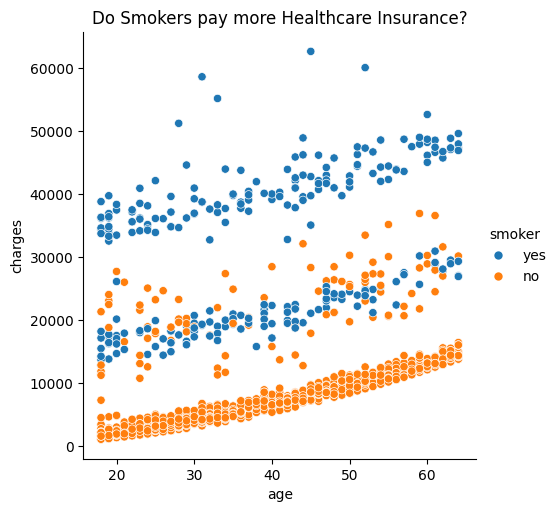

In [22]:
#To do this, let's plot a scatterplot
sns.relplot(x='age', y='charges', data=df, hue='smoker')  # Color by smoker

# Add labels and title
plt.xlabel("age")
plt.ylabel("charges")
plt.title("Do Smokers pay more Healthcare Insurance?")
plt.show()

Non-smokers generally have smaller insurance claims compared to smokers, with average claim amounts being just under $10,000$ across all regions. This suggests that non-smokers tend to experience fewer or less severe health issues that require insurance claims. In contrast, smokers have significantly higher average claims, indicating that smoking is associated with more frequent or severe health problems that lead to higher insurance costs.

Now to see the effect of a child for insurace costs

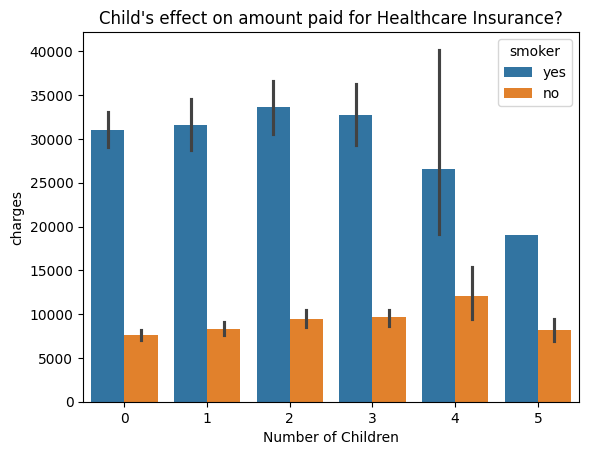

In [23]:
sns.barplot(x='children', y='charges', data=df, hue='smoker')  # Color by smoker

# Add labels and title
plt.xlabel("Number of Children")
plt.ylabel("charges")
plt.title("Child's effect on amount paid for Healthcare Insurance?")
plt.show()

## Modelling

In [24]:
scaler=RobustScaler()
X=df_copy.drop('charges',axis=1)
y=df_copy['charges']
X_scaled=scaler.fit_transform(X)

RobustScaler is a preprocessing technique in machine learning used to scale features using statistics that are robust to outliers. Unlike standard scaling which uses mean and standard deviation, RobustScaler uses median and interquartile range (IQR).

In [25]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr=LinearRegression()

In [26]:
lr.fit(x_train, y_train)

LinearRegression()

## Performance Metrics

R² (Coefficient of Determination):

Definition: R² measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It indicates how well the regression model fits the data.
Range: 0 to 1 (sometimes negative for poorly fitting models).
Interpretation: A value closer to 1 implies a better fit, meaning the model explains most of the variance in the data. An R² of 0 means the model does not explain any of the variance.

MAE (Mean Absolute Error):

Definition: MAE is the average of the absolute differences between the predicted values and the actual values. It measures the magnitude of errors in a set of predictions, without considering their direction.
Range: 0 to ∞.
Interpretation: A lower MAE indicates better model accuracy, with 0 being a perfect prediction. Take this as a percentage of the average of y, and you have MAPE. Generally speaking, a value below 10% is great, 10% to 20% is still good, and above 50% means your model is inaccurate because you're wrong more than you're right.

In [27]:
y_pred=lr.predict(x_test)

R^2 Score

In [28]:
print("R^2",r2_score(y_test,y_pred))

R^2 0.7579887696248816


Mean Absolute Error

In [29]:
mae = mean_absolute_error(y_test,y_pred)
print("MAE", mae)
print("MAE as a percentage of avg of y", mae/y_test.mean()*100)

MAE 4323.785177911863
MAE as a percentage of avg of y 31.895828031198608


Conclusion is that we have a decent model with close to 75% R^2 and 30% MAPE. We could make it better by using other ML techniques but that is out of the scope of this assignment